# Final Project 

## Task 1-4

### Import Libraries and Data Set 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [63]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [64]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Boxplot 1
##### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Medium Value of Owner Occupied Homes [in Thousands]')

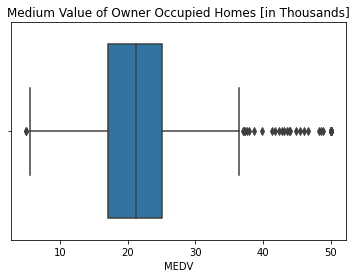

In [65]:
ownerhomes_plot = sns.boxplot(boston_df['MEDV'])
plt.title('Medium Value of Owner Occupied Homes [in Thousands]')

### Histogram
##### Provide a  histogram for the Charles river variable

Text(0.5, 1.0, 'Charles River')

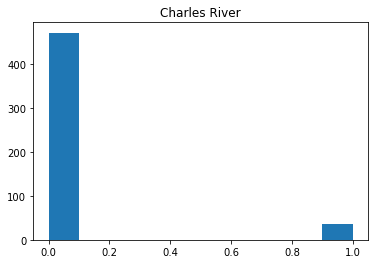

In [66]:
CharlesR_Hist = plt.hist(boston_df['CHAS'])
plt.title('Charles River')

### Boxplot 2
##### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Age Groups vs MEDV')

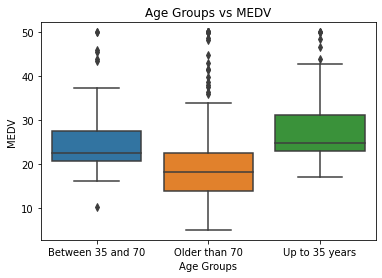

In [154]:
# Discretize Data 

def make_groups(a):
    if a <= 35:
        a = 'Up to 35 years'
    elif a <= 70:
        a = 'Between 35 and 70'
    else:
        a = 'Older than 70'
    return a

boston_df['Age Groups'] = boston_df['AGE'].apply(make_groups)
sns.boxplot(x = 'Age Groups', y = 'MEDV', data = boston_df)
plt.title('Age Groups vs MEDV')

### Scatterplot
#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0, 0.5, 'Non-Retail Business Acres'),
 Text(0.5, 0, 'Nitric Oxide Concentrations [ppm]'),
 Text(0.5, 1.0, 'NO Concentration to Proportion of Non-Retail Business Acres')]

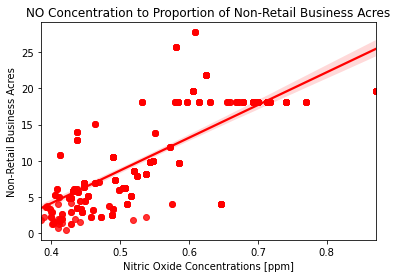

In [69]:
# NO vs Non-Retail Business Acres 

NO_acres = sns.regplot(boston_df['NOX'], boston_df['INDUS'], color = 'red')
NO_acres.set(xlabel ='Nitric Oxide Concentrations [ppm]',
             ylabel = 'Non-Retail Business Acres',
             title ='NO Concentration to Proportion of Non-Retail Business Acres')

###### With control for error, there appears to be a negative linear correlation between NO concentrations and business acres. 

### Histogram for Pupil : Teacher 
#### Create a histogram for the pupil to teacher ratio variable


Text(0.5, 1.0, 'Pupils to Teachers')

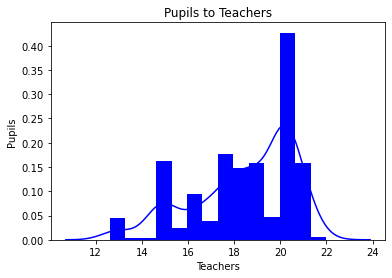

In [70]:
Pupil_Teacher_Hist = sns.distplot(boston_df['PTRATIO'],
                                  kde = True,
                                  color = 'blue',
                                  hist_kws = {'linewidth': 15, 'alpha': 1})
Pupil_Teacher_Hist.set(xlabel = 'Teachers', ylabel = 'Pupils')
plt.title('Pupils to Teachers')

# Task 5

### Levene's Test, Independent T-test and Pearson Correlation for MEDV and CHAS 
#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [88]:
stats.levene(boston_df['CHAS'] == 0,
             boston_df['CHAS'] == 1, 
             center='median')
statistic, pvalue = stats.levene(boston_df['CHAS'] == 0, 
                                 boston_df['CHAS'] == 1)
print('Statistic: %s p-value: %s' %(statistic, pvalue))

Statistic: 0.0 p-value: 1.0


###### Since p > .05, we may assume equal variance 

In [90]:
boston_ttest = stats.ttest_ind(boston_df['CHAS'] == 0,
                boston_df['CHAS'] == 1,
                equal_var = True)
statistic, pvalue = stats.ttest_ind(boston_df['CHAS'] == 0, 
                                    boston_df['CHAS'] == 1)
print('Statistic: %s p-value: %s' %(statistic, pvalue))

Statistic: 53.96009489490948 p-value: 8.757522855106094e-300


###### Since p < .05, we may reject H0 that there is no difference in the median value of houses bound by the Charles River 

### ANOVA for MEDV and AGE

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [135]:
import scipy.stats as stats
boston_df.loc[(boston_df['AGE'] <= 80), 'Age_Group'] = '80 years and younger'
boston_df.loc[(boston_df['AGE'] > 80), 'Age_Group'] = '81 years and older'

older = boston_df[boston_df['Age_Group'] == '81 years and older']['MEDV']
younger = boston_df[boston_df['Age_Group'] == '80 years and younger']['MEDV']


f_statistic, p_value = stats.f_oneway(older, younger)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 70.44779821320425, P-Value: 4.804129407443654e-16


##### The p <. 05 indicates that we may reject H0, there is sufficient evidence to suggest a significant difference in the median values of the two groups of homes

### Pearson for NOX and INDUS

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [97]:
from scipy.stats import pearsonr
stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

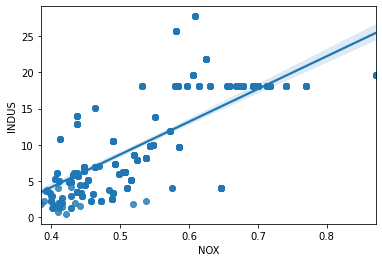

In [98]:
sns.regplot(boston_df['NOX'],boston_df['INDUS'])

#### The Pearson R and linear regression plot both indicate an existing negative correlation, 'as land goes up, NO goes down' 

### Regression Analysis for MEDV

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0.5, 1.0, 'Impact of DIS to MEDV')

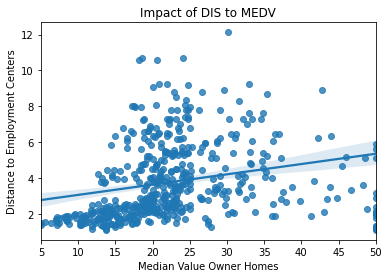

In [141]:
sns.regplot(boston_df['MEDV'], boston_df['DIS'])
plt.xlabel('Median Value Owner Homes')
plt.ylabel('Distance to Employment Centers')
plt.title('Impact of DIS to MEDV')

##### The trend indicates that there are more homeowners closer to the employment centers.